<a href="https://colab.research.google.com/github/araujorobert/Time-series-course/blob/main/5.%20Forcast_mediante_Modelo_AR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# US population dataset
Población mensual de E.U estimada en miles de personas, desde Enero 2011 a Diciembre 2018 (96 datos, 8 años).

In [59]:
import pandas as pd
import numpy as np
%matplotlib inline

# Load specific forecasting tools
from statsmodels.tsa.ar_model import AR,ARResults

df = pd.read_csv('uspopulation.csv',index_col='DATE',parse_dates=True) # parse_dates convierte el formato a tipo "fecha"
df.index.freq = 'MS'

In [111]:
#df = pd.read_csv('uspopulation.csv', index_col='DATE')
df.head()

,PopEst
DATE,
2011-01-01,311037
2011-02-01,311189
2011-03-01,311351
2011-04-01,311522
2011-05-01,311699


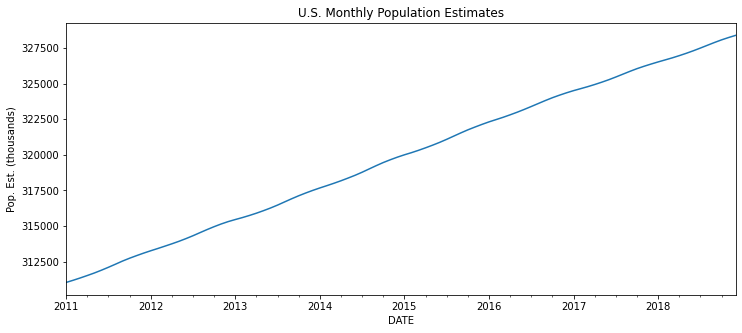

In [112]:
title='U.S. Monthly Population Estimates'
ylabel='Pop. Est. (thousands)'

ax = df['PopEst'].plot(figsize=(12,5),title=title);
ax.set(ylabel=ylabel);

# Datos de entrenamiento y prueba

In [141]:
train = df.iloc[:84]
test = df.iloc[84:]

# Modelo AR(1)

In [142]:
# Ignore harmless warnings
import warnings
warnings.filterwarnings("ignore")

In [143]:
model = AR(train['PopEst'])
AR1_fit = model.fit(maxlag=1,method='mle')
print('Lag:',AR1_fit.k_ar)
print('Coefficients:')
print(AR1_fit.params)

Lag: 1
Coefficients:
const        156.148823
L1.PopEst      0.999510
dtype: float64


In [144]:
start=len(train)
end=len(train)+len(test)-1
predictions1 = AR1_fit.predict(start=start, end=end, dynamic=False).rename('AR(1) Predictions')

In [145]:
predictions1

2018-01-01    326374.143803
2018-02-01    326370.289496
2018-03-01    326366.437078
2018-04-01    326362.586550
2018-05-01    326358.737909
2018-06-01    326354.891154
2018-07-01    326351.046286
2018-08-01    326347.203302
2018-09-01    326343.362203
2018-10-01    326339.522987
2018-11-01    326335.685652
2018-12-01    326331.850199
Freq: MS, Name: AR(1) Predictions, dtype: float64

In [146]:
# Comparando predicciones con valores reales
for i in range(len(predictions1)):
    print(f"predicted={predictions1[i]:<11.10}, expected={test['PopEst'][i]}")

predicted=326374.1438, expected=326527
predicted=326370.2895, expected=326669
predicted=326366.4371, expected=326812
predicted=326362.5865, expected=326968
predicted=326358.7379, expected=327134
predicted=326354.8912, expected=327312
predicted=326351.0463, expected=327502
predicted=326347.2033, expected=327698
predicted=326343.3622, expected=327893
predicted=326339.523 , expected=328077
predicted=326335.6857, expected=328241
predicted=326331.8502, expected=328393


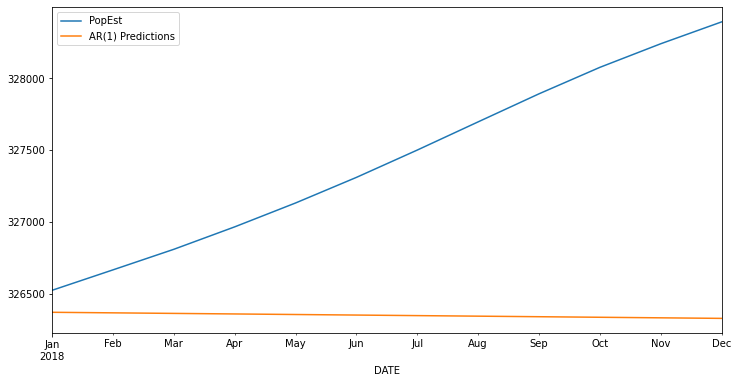

In [147]:
test['PopEst'].plot(legend=True)
predictions1.plot(legend=True,figsize=(12,6));

# Modelo AR(2)

In [148]:
# Recall that our model was already created above based on the training set
model2 = AR(train['PopEst'])
AR2_fit = model2.fit(maxlag=2,method='mle')
print('Lag:',AR2_fit.k_ar)
print('Coefficients:',AR2_fit.params)

Lag: 2
Coefficients: const        136.997173
L1.PopEst      1.996410
L2.PopEst     -0.996840
dtype: float64


In [149]:
start=len(train)
end=len(train)+len(test)-1
predictions2 = AR2_fit.predict(start=start, end=end, dynamic=False).rename('AR(2) Predictions')

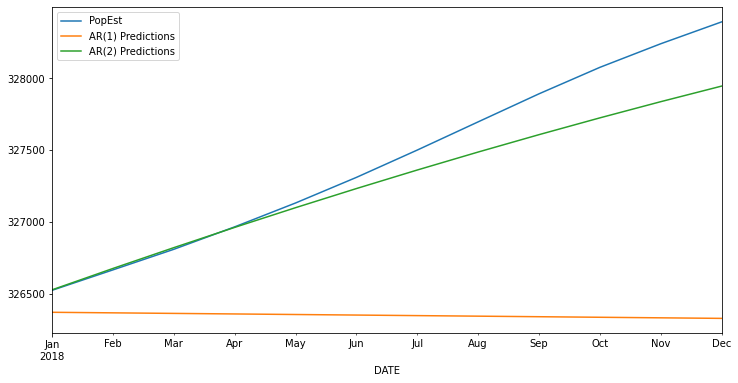

In [150]:
test['PopEst'].plot(legend=True)
predictions1.plot(legend=True)
predictions2.plot(legend=True,figsize=(12,6));

# Modelo AR(p)

In [151]:
modelp = AR(train['PopEst'])
ARfit = modelp.fit(ic='bic')
print(f'Lag: {ARfit.k_ar}')
print(f'Coefficients:\n{ARfit.params}')

Lag: 8
Coefficients:
const        82.309677
L1.PopEst     2.437997
L2.PopEst    -2.302100
L3.PopEst     1.565427
L4.PopEst    -1.431211
L5.PopEst     1.125022
L6.PopEst    -0.919494
L7.PopEst     0.963694
L8.PopEst    -0.439511
dtype: float64


In [152]:
start = len(train)
end = len(train)+len(test)-1
rename = f'AR(8) Predictions'

predictions8 = ARfit.predict(start=start,end=end,dynamic=False).rename(rename)

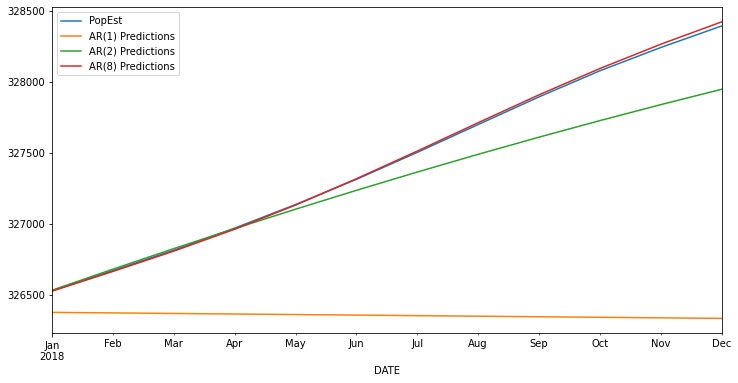

In [153]:
test['PopEst'].plot(legend=True)
predictions1.plot(legend=True)
predictions2.plot(legend=True)
predictions8.plot(legend=True,figsize=(12,6));

# Evaluar el modelo
Error cuadrático medio: Mean Squared Error (MSE).



In [154]:
from sklearn.metrics import mean_squared_error

labels = ['AR(1)','AR(2)','AR(8)']
preds = [predictions1, predictions2, predictions8]  # these are variables, not strings!

for i in range(3):
    error = mean_squared_error(test['PopEst'], preds[i])
    print(f'{labels[i]} Error: {error:11.10}')

AR(1) Error: 1553570.376
AR(2) Error:  53005.3342
AR(8) Error: 186.9705375


# Predicciones

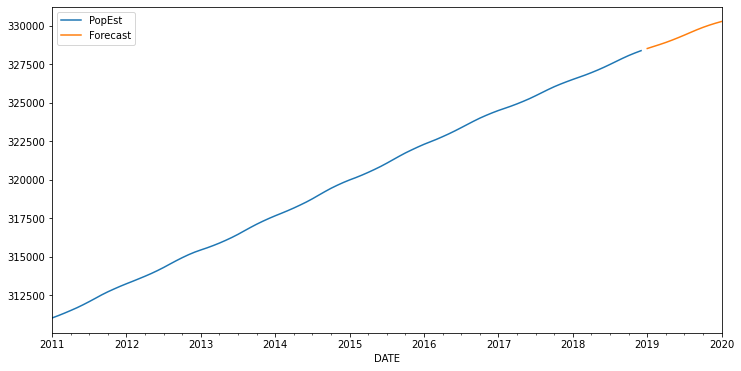

In [110]:
# First, retrain the model on the full dataset
model = AR(df['PopEst'])

# Next, fit the model
ARfit = model.fit(maxlag=8,method='mle')

# Make predictions
fcast = ARfit.predict(start=len(df), end=len(df)+12, dynamic=False).rename('Forecast')

# Plot the results
df['PopEst'].plot(legend=True)
fcast.plot(legend=True,figsize=(12,6));